# Visualising taxa abundance

In [6]:
setwd("/mnt/c/git_repos/blood_microbial_signatures/")
require(tidyverse)
require(ggplot2)
require(data.table)
require(foreach)
require(ggpubr)
require(scales)
require(ggsci)
require(ggforce)


Loading required package: ggpubr

Loading required package: ggsci

Loading required package: ggforce



### Load non-contaminant list

In [7]:
# After thresholding
prev_df <- fread("results/decontamination/prevalence_RA0.005_read10.csv")
original_list <- colnames(prev_df)
original_list <- original_list[original_list != "npm_research_id"]
length(original_list)

# Differential prevalence
diff_prev_nc <- read.csv("results/decontamination/diff_prev_V3/noncontaminants.RA0.005.read_threshold10.max_prev0.25.fold_diff2.txt")$taxa
diff_prev_c <- read.csv("results/decontamination/diff_prev_V3/contaminants.RA0.005.read_threshold10.max_prev0.25.fold_diff2.txt")$taxa
length(diff_prev_nc)
length(diff_prev_c)

# Correlation filter
corr_nc <- read.csv("results/decontamination/correlation_decontamination/nc.diff_prev_V3.RA0.005.read_threshold10.max_prev0.25.fold_diff2.corr_t0.7.within_batch.S.n9999.txt")$non_contaminant_taxon
corr_c <- read.csv("results/decontamination/correlation_decontamination/contam.diff_prev_V3.RA0.005.read_threshold10.max_prev0.25.fold_diff2.corr_t0.7.within_batch.S.n9999.txt")$contaminant

length(corr_nc)
length(corr_c)

# Simple batch filter
batch_nc <- read.csv("results/decontamination/simple_batch_decontam/nc.corr_t0.7.within_batch.txt")$taxa
length(batch_nc)

# After max count filter
species_read_zeroed <- fread("results/decontamination/read_matrix_n117.global_decontaminated.zeroed.csv")
final_list <- colnames(species_read_zeroed)
final_list <- final_list[final_list != "npm_research_id"]
length(final_list)

[1] 870

[1] 708

[1] 162

[1] 526

[1] 337

[1] 182

[1] 117

In [3]:
length(batch_nc)

[1] 182

## Compare to host range list (Shaw et al., 2020)

Original paper: https://onlinelibrary.wiley.com/doi/full/10.1111/mec.15463

Data: https://figshare.com/articles/dataset/The_phylogenetic_range_of_bacterial_and_viral_pathogens_of_vertebrates_dataset_and_supplementary_material/8262779

### Get human infection list

In [8]:
host_df <- read.csv("data/PathogenVsHostDB-2019-05-30.csv", row.names = 1)
human_df <- host_df %>% 
    select(Species, Human) %>%
    distinct()

before_df <- tibble(Species = original_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df)

before_df
# fwrite(before_df, "results/decontamination/comparison/shaw_human_list_raw.csv")

Warning message:
“Expected 3 pieces. Additional pieces discarded in 66 rows [26, 27, 63, 90, 91, 92, 94, 95, 97, 98, 102, 103, 159, 355, 356, 370, 385, 391, 399, 409, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 584 rows [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, ...].”
Joining with `by = join_by(Species)`


Species,Genus,Human
<chr>,<chr>,<chr>
Fusarium graminearum,Fusarium,NA
Toxoplasma gondii,Toxoplasma,NA
Pseudomonas sp. SXM-1,Pseudomonas,NA
Pseudomonas tolaasii,Pseudomonas,NA
Pseudomonas fluorescens,Pseudomonas,Yes
Pseudomonas veronii,Pseudomonas,NA
Pseudomonas oleovorans,Pseudomonas,NA
Pseudomonas alcaliphila,Pseudomonas,NA
Buchnera aphidicola,Buchnera,NA


### After manual literature review

In [9]:
human_df_parsed <- fread("results/decontamination/comparison/shaw_human_list_parsed.csv") %>%
    select(-Genus)

before_df_parsed <- tibble(Species = original_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df_parsed)

after_df <- tibble(Species = final_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df_parsed)

Warning message:
“Expected 3 pieces. Additional pieces discarded in 66 rows [26, 27, 63, 90, 91, 92, 94, 95, 97, 98, 102, 103, 159, 355, 356, 370, 385, 391, 399, 409, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 584 rows [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, ...].”
Joining with `by = join_by(Species)`
Warning message:
“Expected 3 pieces. Additional pieces discarded in 8 rows [16, 41, 79, 94, 97, 98, 106, 111].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 97 rows [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, ...].”
Joining with `by = join_by(Species)`


Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


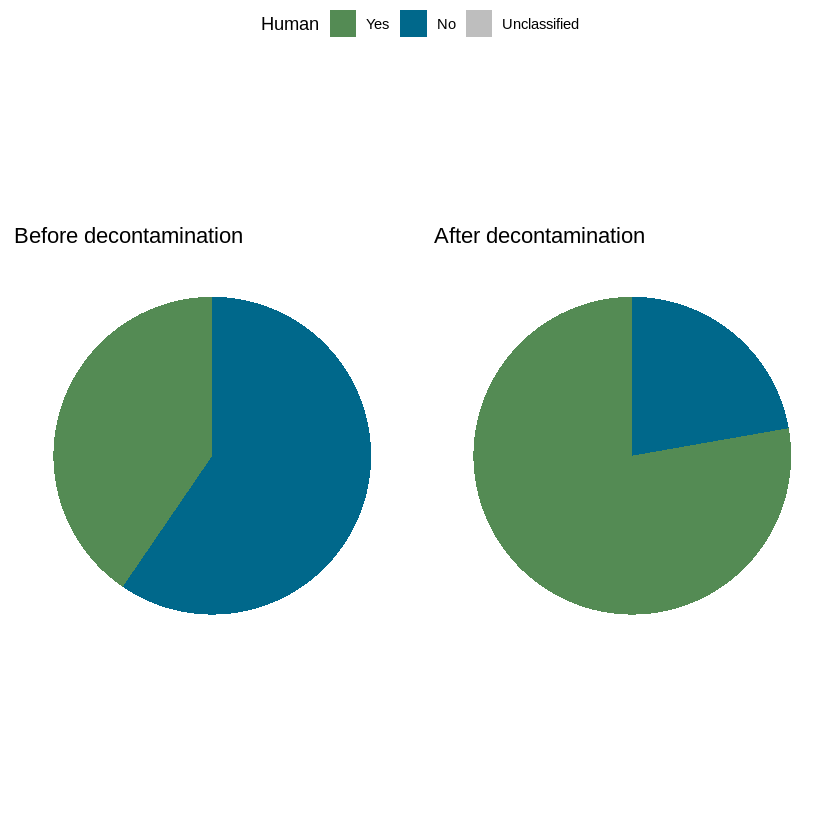

In [10]:
get_shaw_circle <- function(df, title) {
    df %>% 
        mutate(Human = ifelse(is.na(Human), "Unclassified", Human)) %>%
        mutate(Human = factor(Human, levels = c("Yes", "No", "Unclassified"))) %>%
        ggplot(aes(x = 1, fill = Human)) +
            geom_bar(aes(y = ..count..)) +
            coord_polar("y") +
            theme_minimal() +
            labs(title = title) +
            theme(axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  panel.border = element_blank(),
                  panel.grid = element_blank(),
                  axis.ticks = element_blank(),
                  axis.text = element_blank()) +
            scale_fill_manual(limits = c("Yes", "No", "Unclassified"),
                          values = c("palegreen4", "deepskyblue4", "grey"))
}

ggarrange(get_shaw_circle(before_df_parsed, "Before decontamination"), 
          get_shaw_circle(after_df, "After decontamination"), 
          common.legend = T)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


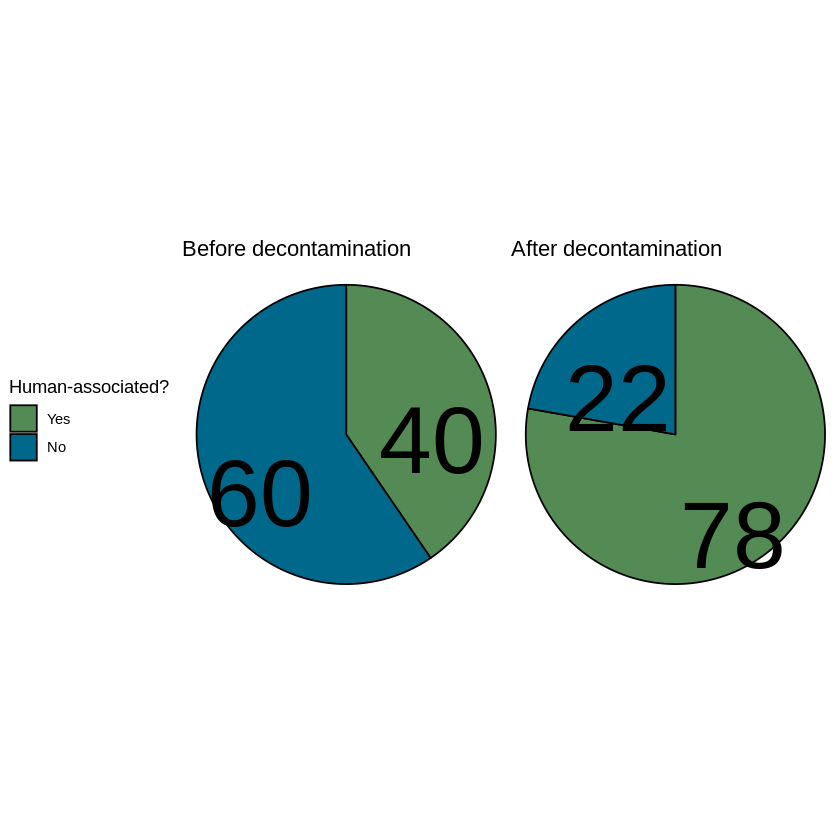

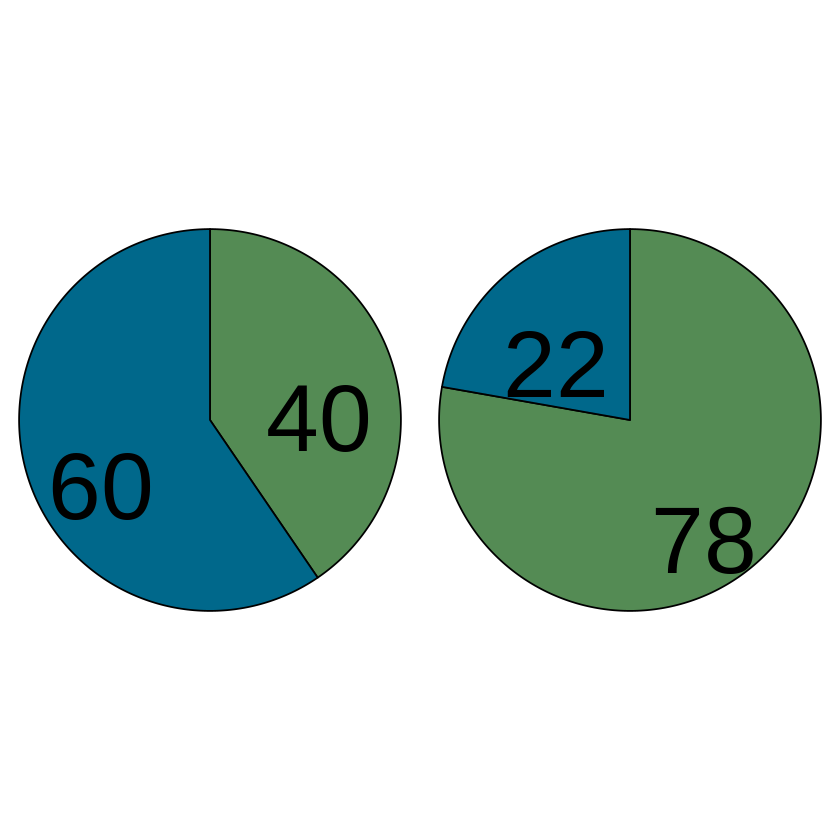

In [23]:
get_shaw_circle <- function(df, title) {
    rpie <- 1
    rlabel <-  0.6 * rpie
    plot_df <- df %>% 
        mutate(Human = factor(Human, levels = c("Yes", "No"))) %>%
        group_by(Human) %>%
        summarise(cnt = n(), total = nrow(df))
    
    # Save source data
    if (!is.null(title)) {
        title_save <- gsub(" ", "_", title)
        fwrite(plot_df, str_glue("results/figure_source_data_nat_micro/shaw_comparison_{title_save}.csv"))
    }
    
    plot_df %>%
        mutate(end_angle = 2 * pi * cumsum(cnt) / total,      # ending angle for each pie slice
               start_angle = lag(end_angle, default = 0),   # starting angle for each pie slice
               mid_angle = 0.5 * (start_angle + end_angle)) %>%  # middle of each pie slice, for the text label
        ggplot() +
        geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = rpie,
                    start = start_angle, end = end_angle, fill = Human)) +
        geom_text(aes(x = rlabel * sin(mid_angle), y = rlabel * cos(mid_angle), label = round(cnt / total * 100)),
                    hjust = 0.5, vjust = 1, size = 20) +
        coord_fixed() +
        scale_x_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_y_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_fill_manual(limits = c("Yes", "No"),
                          values = c("palegreen4", "deepskyblue4")) +
        theme(panel.background = element_rect(fill = "white"),
              plot.margin=grid::unit(c(0,0,0,0),"cm"),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks=element_blank(),
              legend.position = "none",
              axis.ticks.length = unit(0, "pt")) +
        labs(x = NULL, y = NULL, fill = NULL) +
        labs(fill = "Human-associated?", title = title)

}

ggarrange(get_shaw_circle(before_df_parsed, "Before decontamination"), 
          get_shaw_circle(after_df, "After decontamination"), 
          common.legend = T, legend = "left")

ggsave("results/decontamination/comparison/shaw_comparison.pdf", dpi = 600)

# Get separate plots
before_shaw <- get_shaw_circle(before_df_parsed, NULL)
ggsave("results/decontamination/comparison/shaw_before_nolegend.pdf", plot = before_shaw, dpi = 600)

after_shaw <- get_shaw_circle(after_df, NULL)
ggsave("results/decontamination/comparison/shaw_after_nolegend.pdf", plot = after_shaw, dpi = 600)


ggarrange(get_shaw_circle(before_df_parsed, NULL), 
          get_shaw_circle(after_df, NULL), legend = "none")

## Compare to contaminant list (Poore et al., 2020)

Supplementary Table 7 from https://www.nature.com/articles/s41586-020-2095-1#MOESM2

In [12]:
poore_list <- fread("data/poore_et_al/poore_et_al_contaminant_list.csv")
before_df2 <- before_df_parsed %>%
    left_join(poore_list)

after_df2 <- after_df %>%
    left_join(poore_list)

Joining with `by = join_by(Genus)`
Joining with `by = join_by(Genus)`


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


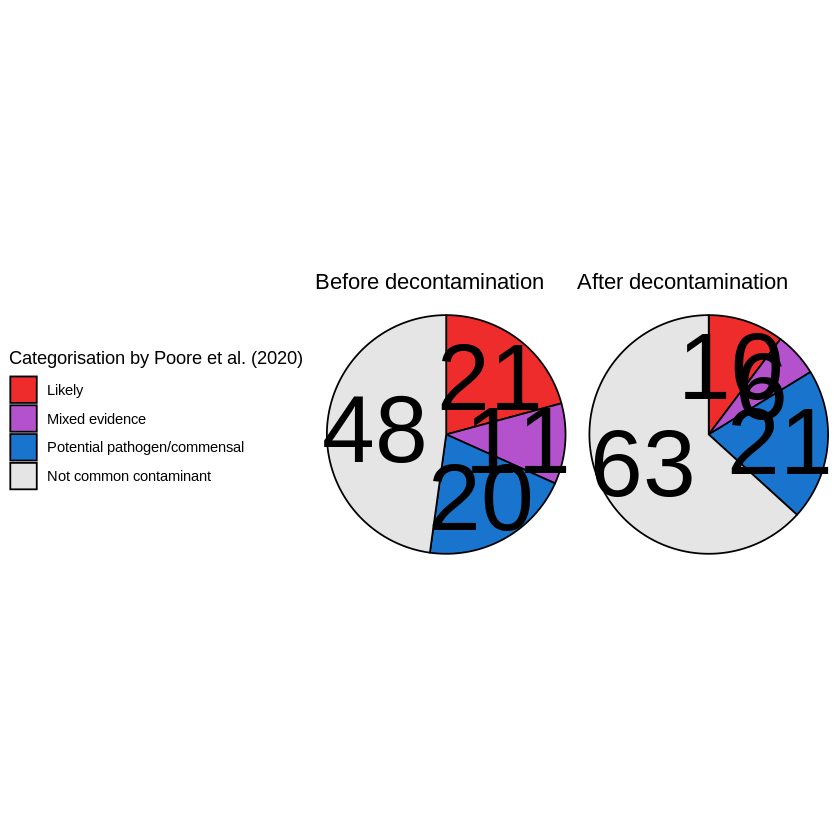

In [21]:
get_poore_circle <- function(df, title) {
    rpie <- 1
    rlabel <-  0.6 * rpie
    
    plot_df <- df %>% 
        mutate(category = case_when(is.na(category) ~ "Not common contaminant",
                                    category == "LIKELY CONTAMINANT" ~ "Likely",
                                    category == "POTENTIALLY PATHOGENIC OR COMMENSAL" ~ "Potential pathogen/commensal",
                                    category == "MIXED EVIDENCE" ~ "Mixed evidence")) %>%
        mutate(category = factor(category, c("Likely", 
                                             "Mixed evidence",
                                             "Potential pathogen/commensal",
                                             "Not common contaminant"))) %>%
        group_by(category) %>%
        summarise(cnt = n(), total = nrow(df))
    
        # Save source data
        if (!is.null(title)) {
            title_save <- gsub(" ", "_", title)
            fwrite(plot_df, str_glue("results/figure_source_data_nat_micro/poore_comparison_{title_save}.csv"))
        }
    
    plot_df %>%
        mutate(end_angle = 2 * pi * cumsum(cnt)/ total,      # ending angle for each pie slice
               start_angle = lag(end_angle, default = 0),   # starting angle for each pie slice
               mid_angle = 0.5 * (start_angle + end_angle)) %>%  # middle of each pie slice, for the text label
        ggplot() +
        geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = rpie,
                    start = start_angle, end = end_angle, fill = category)) +
        geom_text(aes(x = rlabel * sin(mid_angle), y = rlabel * cos(mid_angle), label = round(cnt / total * 100)),
                    hjust = 0.5, vjust = 0.5, size = 20) +
        coord_fixed() +
        scale_x_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_y_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_fill_manual(values = c("firebrick2", "mediumorchid3", "dodgerblue3", "grey90")) +
        theme(panel.background = element_rect(fill = "white"),
              plot.margin=grid::unit(c(0,0,0,0),"cm"),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks=element_blank(),
              legend.position = "none",
              axis.ticks.length = unit(0, "pt")) +
        labs(x = NULL, y = NULL, fill = NULL) +
        labs(fill = "Categorisation by Poore et al. (2020)", title = title)
}

ggarrange(get_poore_circle(before_df2, "Before decontamination"), 
          get_poore_circle(after_df2, "After decontamination"), 
          common.legend = T, legend = "left")

ggsave("results/decontamination/comparison/poore_comparison.pdf", dpi = 600)

# Get separate plots
before_poore <- get_poore_circle(before_df2, NULL)
ggsave("results/decontamination/comparison/poore_before_nolegend.pdf", plot = before_poore, dpi = 600)

after_poore <- get_poore_circle(after_df2, NULL)
ggsave("results/decontamination/comparison/poore_after_nolegend.pdf", plot = after_poore, dpi = 600)

## Compare to hospital blood culture records

In [14]:
blood_list <- read.csv("results/blood_culture_records/blood_culture_taxa_list.txt")$taxa
nc_list <- fread("results/decontamination/curated_n117_global_decontamination_stats.csv")$taxa
nc_list <- tolower(unique(nc_list))
all_list <- tolower(before_df_parsed$Species)
length(nc_list)


[1] 117

In [15]:
all_in_blood <- all_list[all_list %in% blood_list]
nc_in_blood <- nc_list[nc_list %in% blood_list]

missing_after_decon <- all_in_blood[!(all_in_blood %in% nc_in_blood)]

In [16]:
read_df <- fread("results/decontamination/read_matrix.raw.zeroed.csv")

colnames(read_df) <- tolower(colnames(read_df))
read_df %>%
    select(all_of(missing_after_decon)) %>%
    pivot_longer(everything(), names_to = "taxa", values_to = "read_count") %>%
    filter(taxa == "proteus mirabilis", read_count != 0)
#     group_by(taxa) %>%
#     summarise(max = max(read_count)) %>%
#     arrange(max)

taxa,read_count
<chr>,<int>
proteus mirabilis,1338


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


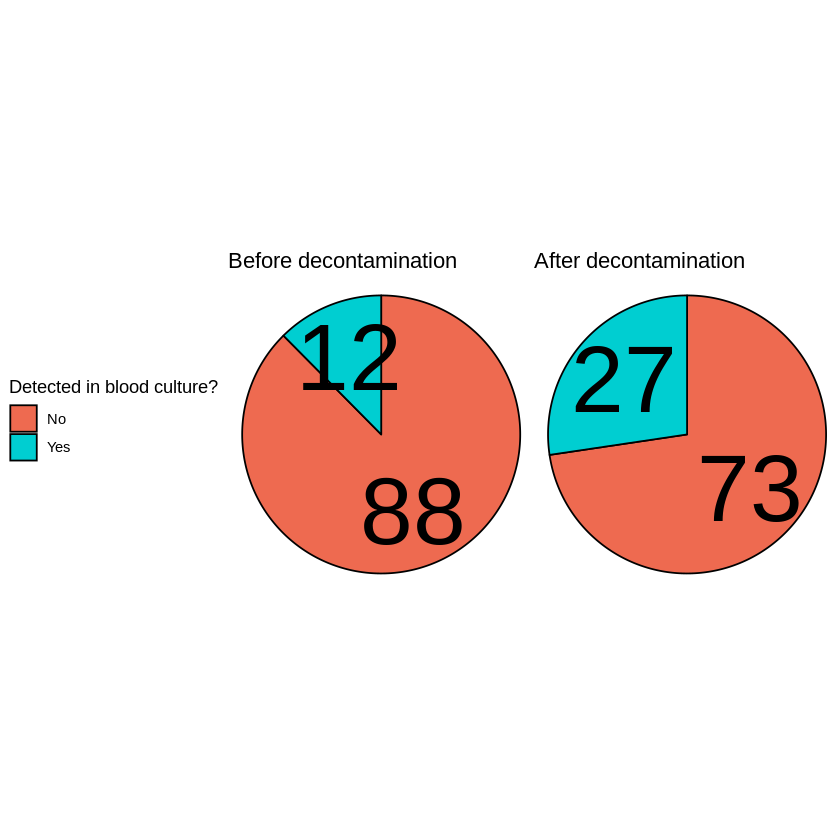

In [20]:
blood_list <- read.csv("results/blood_culture_records/blood_culture_taxa_list.txt")$taxa

get_blood_circle <- function(df, title) {
    rpie <- 1
    rlabel <-  0.6 * rpie
    
    plot_df <- df %>% 
        mutate(Species = tolower(Species)) %>%
        mutate(category = ifelse(Species %in% blood_list, "Yes", "No")) %>%
        group_by(category) %>%
        summarise(cnt = n(), total = nrow(df))
    
    # Save source data
    if (!is.null(title)) {
        title_save <- gsub(" ", "_", title)
        fwrite(plot_df, str_glue("results/figure_source_data_nat_micro/blood_comparison_{title_save}.csv"))
    }
    
    plot_df %>%
        mutate(end_angle = 2 * pi * cumsum(cnt)/ total,      # ending angle for each pie slice
               start_angle = lag(end_angle, default = 0),   # starting angle for each pie slice
               mid_angle = 0.5 * (start_angle + end_angle)) %>%  # middle of each pie slice, for the text label
        ggplot() +
        geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = rpie,
                    start = start_angle, end = end_angle, fill = category)) +
        geom_text(aes(x = rlabel * sin(mid_angle), y = rlabel * cos(mid_angle), label = round(cnt / total * 100)),
                    hjust = 0.5, vjust = 0.5, size = 20) +
        coord_fixed() +
        scale_x_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_y_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_fill_manual(values = c("coral2", "darkturquoise")) +
        theme(panel.background = element_rect(fill = "white"),
              plot.margin=grid::unit(c(0,0,0,0),"cm"),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks=element_blank(),
              legend.position = "none",
              axis.ticks.length = unit(0, "pt")) +
        labs(x = NULL, y = NULL, fill = NULL) +
        labs(fill = "Detected in blood culture?", title = title)
}

ggarrange(get_blood_circle(before_df_parsed, "Before decontamination"), 
          get_blood_circle(after_df, "After decontamination"), 
          common.legend = T, legend = "left")

ggsave("results/decontamination/comparison/blood_comparison.pdf", dpi = 600)

# Get separate plots
before_blood <- get_blood_circle(before_df_parsed, NULL)
ggsave("results/decontamination/comparison/blood_before_nolegend.pdf", plot = before_blood, dpi = 600)

after_blood <- get_blood_circle(after_df, NULL)
ggsave("results/decontamination/comparison/blood_after_nolegend.pdf", plot = after_blood, dpi = 600)